## Package imports, global variables and functions

In [2]:
import mysql.connector
import json
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 15]

host = "localhost"
un = "root"
pw=""
db_name = "yelp"

def mysql_result_to_df(result, cursor):
    field_names = [i[0] for i in mycursor.description]
    return pd.DataFrame(myresult, columns=field_names)

def df_to_csv(df, fp, ext=".csv", na_rep=""):
    try:
        df.to_csv(fp + ext, encoding="utf-8", header = True,\
            doublequote = True, sep=",", index=False, na_rep=na_rep)
    except Exception as e:
        print("Error: {}".format(str(e)))

fp = "C:/Users/Tolis/Documents/Data Analytics Cource/CKME136 X10/Project/data/final/summary"

## Connect to yelp db and load user table

In [3]:
mydb = mysql.connector.connect(
  host=host,
  user=un,
  passwd=pw,
  database=db_name
)

mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM review")

myresult = mycursor.fetchall()

review_df = mysql_result_to_df(myresult, mycursor)

mycursor.close()
mydb.close()

In [4]:
review_df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,---HLAnHbuLi7vd5TL6uYg,zyp8SaRnZ94sWZpLrifS1Q,l6xZVTEtdZAvNpL1JhYGuw,4,0,0,0,2018-05-26 13:49:33
1,---L4b6VR6HoB-q7cfMWIA,697iJkhX1mkVF9RNhn114Q,XiXu6WHbDoopKpeg7DfKdQ,5,3,1,2,2018-04-15 18:54:27
2,---j05qHS2X7FkXjjMKKtA,E6Aoz-3s4avfweIjziHjbA,cTbFJzHQzFSX-z3JF4abKQ,5,1,0,1,2018-11-02 15:01:11
3,---sPYSgArT4Sd5v1nDVMQ,iVSuN8PrtKVtLzhNiu23uA,OumGHdbdp7WgyYMhcAdjhw,1,0,0,0,2018-07-07 15:16:09
4,--0KlCRJ2xye3I71In3gqw,iUdH5Sats3cF46CePD6CYw,vNoyICtClJd3pcMG96CXsA,5,0,0,0,2018-03-06 03:08:29
5,--0SzSMXVUoAXfackNoB4g,v9P7J6hWWtIblnylQ5UBfA,iCQpiavjjPzJ5_3gPD5Ebg,5,0,0,0,2018-05-09 13:59:37
6,--0tVDx0kTRGrV6e5jrIcg,uEw4OJCZuNL2sjsppG2_Gw,bI28nvujPldWdWsQ5sVRlQ,2,0,0,0,2018-08-11 04:02:35
7,--1JMhPk6K9fZo4FOp_yMw,2xZ1mHP14as5RJ1KOrVU4A,QJatAcxYgK1Zp9BRZMAx7g,2,0,0,0,2018-06-16 17:00:42
8,--23TchR_Yc84EtfTkjvlg,w9URAIc40f_vYRuAGZ_9qQ,m9Cme6bUPuZFtqhN1AgmdQ,4,2,1,1,2018-05-23 20:34:46
9,--29SBl8OUdsRP0aSm-Sxw,P2Q7PgJamWesMxRxI0av_Q,TW53EB3Xw-uWnN3XS8qulQ,1,0,0,0,2018-07-30 15:45:24


In [5]:
#Replace empty strings and json objects to null
review_df = review_df.replace(r'^\s*$', np.nan, regex=True)
review_df = review_df.replace(r'^{}*$', np.nan, regex=True)

## Numeric summaries

In [6]:
#Description of quantitative fields.
df_description_number = review_df.describe(include=[np.number])
print(df_description_number)

              stars        useful         funny          cool
count  1.177662e+06  1.177662e+06  1.177662e+06  1.177662e+06
mean   3.764044e+00  8.310797e-01  2.876640e-01  4.766087e-01
std    1.543753e+00  3.467254e+00  1.927278e+00  3.002302e+00
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    5.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    5.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
max    5.000000e+00  3.580000e+02  2.540000e+02  3.470000e+02


In [7]:
#Description for qualitative
df_description_cat = review_df.describe(include=[np.object])
print(df_description_cat)

                     review_id                 user_id             business_id
count                  1177662                 1177662                 1177662
unique                 1177662                  510785                  124370
top     2irCMa2xJQzEG1ykvmLgAA  I-4KVZ9lqHhk8469X9FvhA  vHz2RLtfUMVRPFmd7VBEHA
freq                         1                     780                    2078


In [8]:
#Row and col counts.
row_count = review_df.shape[0]
col_count = review_df.shape[1]
print(review_df.shape)

(1177662, 8)


In [9]:
#Summary of NULLS
#Doesn't seem to be any nulls
null_columns=review_df.columns[review_df.isnull().any()]
df_description_nulls=review_df[null_columns].isnull().sum()
df_description_nulls = pd.DataFrame(df_description_nulls, columns=["Null Count"])
df_description_nulls["Null Percent"] = df_description_nulls["Null Count"].apply(lambda x: x/row_count)
print(df_description_nulls)

Empty DataFrame
Columns: [Null Count, Null Percent]
Index: []


# Plots

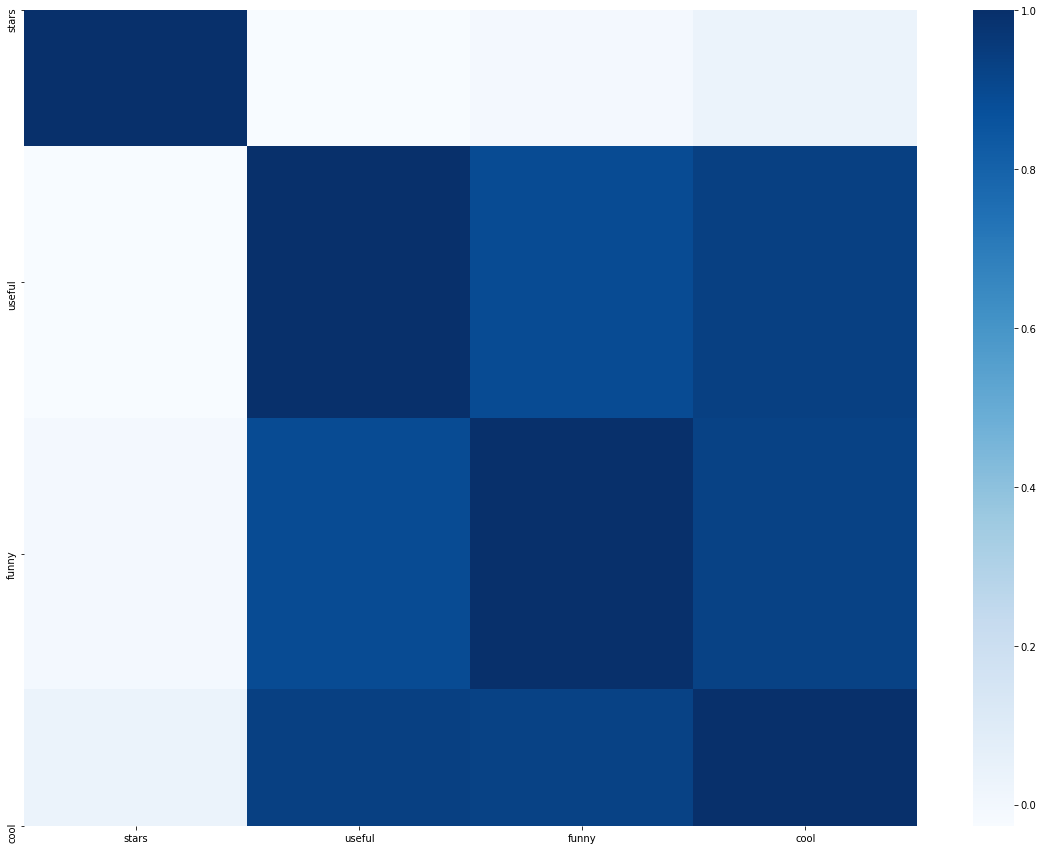

In [10]:
#Visualize correlations between quantitative vars
#variables that are strongly correleated will be removed during the feature selection process.
corr = review_df.corr()
sns.heatmap(corr, cmap="Blues", 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

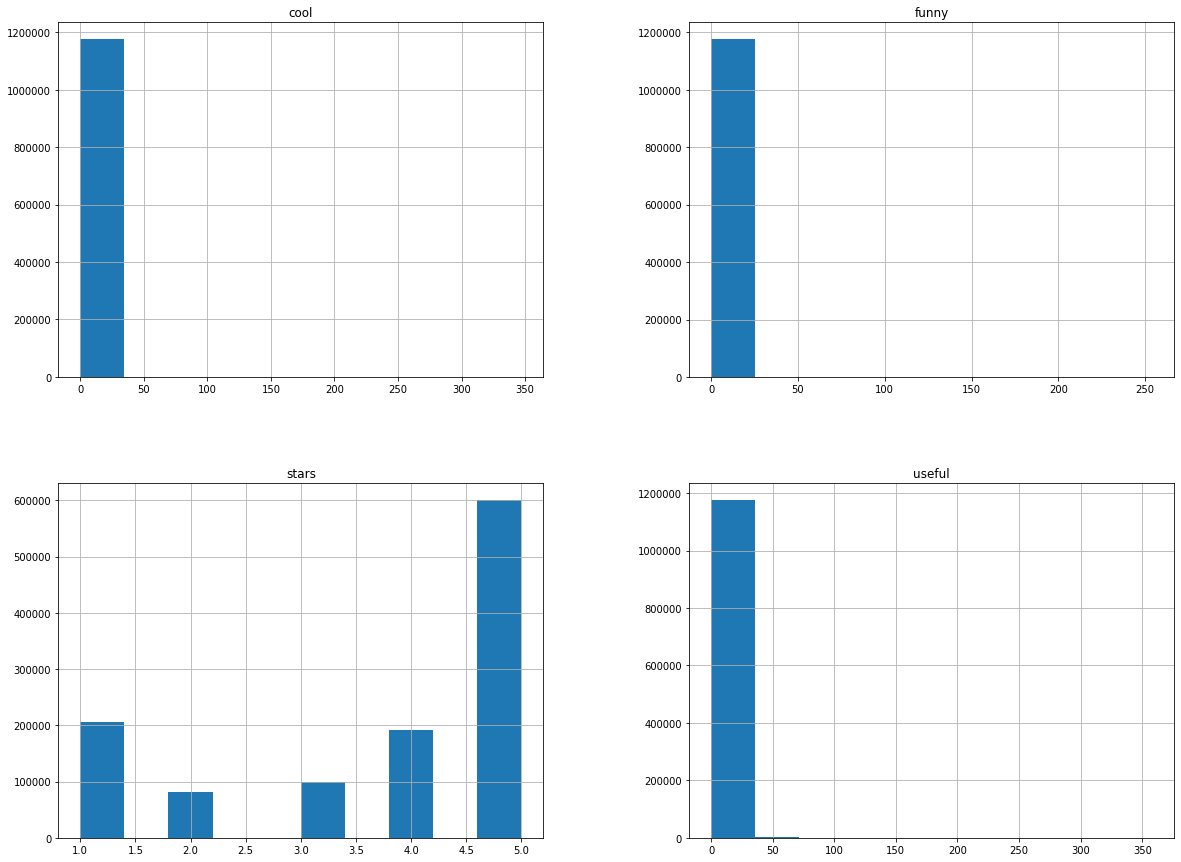

In [11]:
review_df_num = review_df.select_dtypes(include=np.number)


hist = review_df_num.hist()
#Histograms don't really show much here because a lot of the fields are very close together with little spread.
#In addition, most values for these fields seem to be close to 0.
#However, it seems stars has a skewed to the left distribution (due to the peak at 5.0.

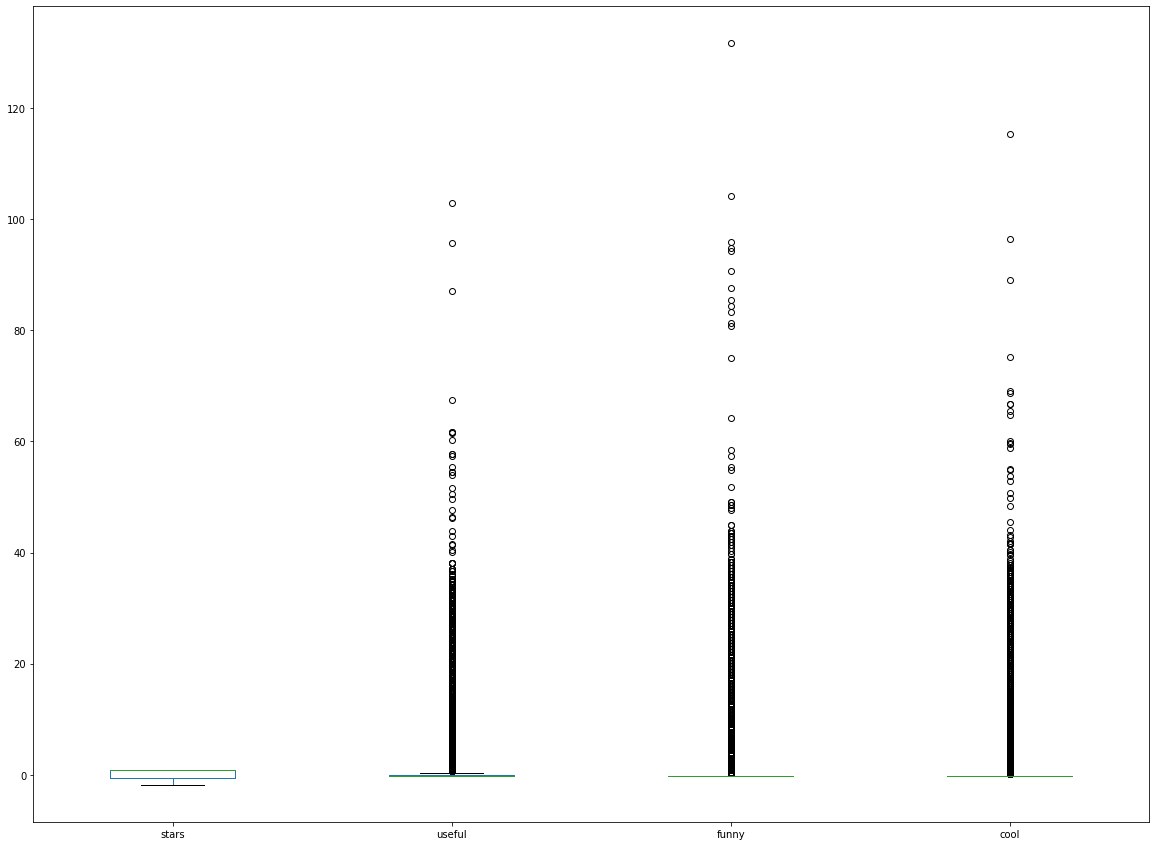

In [12]:
#Scale and center data to compare variance in side-by-side boxplots, and to easily spot outliers.
df_center = (review_df_num - review_df_num.mean())
df_scale = (df_center - df_center.mean())/df_center.std()
df_scale.plot.box()
#A lot of outlier and extremes. These will have to be treated prior to analysis.
#Stars seems to have low spread with no outliers, most likely because there is a max set by yelp.

In [13]:
#Clean up and save description csv.
#The plots can be obtained via screenshot.

#To make sure field names make it in output csv
row_labels = df_description_nulls.index.values
df_description_nulls.insert (0, "Field", row_labels)
df_to_csv(df_description_nulls, fp + "/review_desc_nulls", ext=".csv", na_rep="")

row_labels = df_description_number.index.values
df_description_number.insert (0, "Param", row_labels)
df_to_csv(df_description_number, fp + "/review_desc_number", ext=".csv", na_rep="")

row_labels = df_description_cat.index.values
df_description_cat.insert (0, "Param", row_labels)
df_to_csv(df_description_cat, fp + "/review_desc_cat", ext=".csv", na_rep="")
review_df = None
review_df_num = None
review_df_cat = None